<a href="https://colab.research.google.com/github/kavya-pv/CognoRise-InfoTech/blob/main/Car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **CAR PRICE PREDICTION**

Data describng the car price based on its features in the market. We have to understand the features on which the pricing of cars depends. Specifically, to understand the factors affecting the pricing of cars in market.

In [335]:
#import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [336]:
df=pd.read_csv('/content/CarPrice_Assignment (1).csv')
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


### **DATA PREPROCESSING**

In [337]:
# Getting top 5 rows of Dataset
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [338]:
#Getting last 5 rows of Dataset
df.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [339]:
#Getting all columns
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [340]:
#check the descriptive statistics of numeric variables
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [341]:
#view the dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [342]:
# Getting dataset size
df.shape

(205, 26)

In [343]:
#checking duplicates values
df.duplicated().sum()

0

In [344]:
#checking for missing values
df.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [345]:
df.drop('car_ID',axis=1,inplace=True)

In [346]:
#check CarName columns
df['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

We can see the comapny name present in car name.So split the comapny name

In [347]:
df.CompanyName=df['CarName'].apply(lambda x:  x.split(' ')[0])

<ipython-input-347-fd9e6e24303e>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.CompanyName=df['CarName'].apply(lambda x:  x.split(' ')[0])


In [348]:
df.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

It seems that repeated name with diffrent spelling. Make it proper with unique name by replacing name of company.

In [349]:
df.CompanyName.replace({'maxda':'mazda','Nissan':'nissan','porcshce':'porsche','toyouta':'toyota','vokswagen':'volkswagen','vw':'volkswagen'},inplace=True)

In [350]:
#removing the unwanted columns
df.drop('CarName',axis=1,inplace=True)

In [351]:
df

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


### **DATA VISUALIZATION**

<ipython-input-352-3946933f621f>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.price)


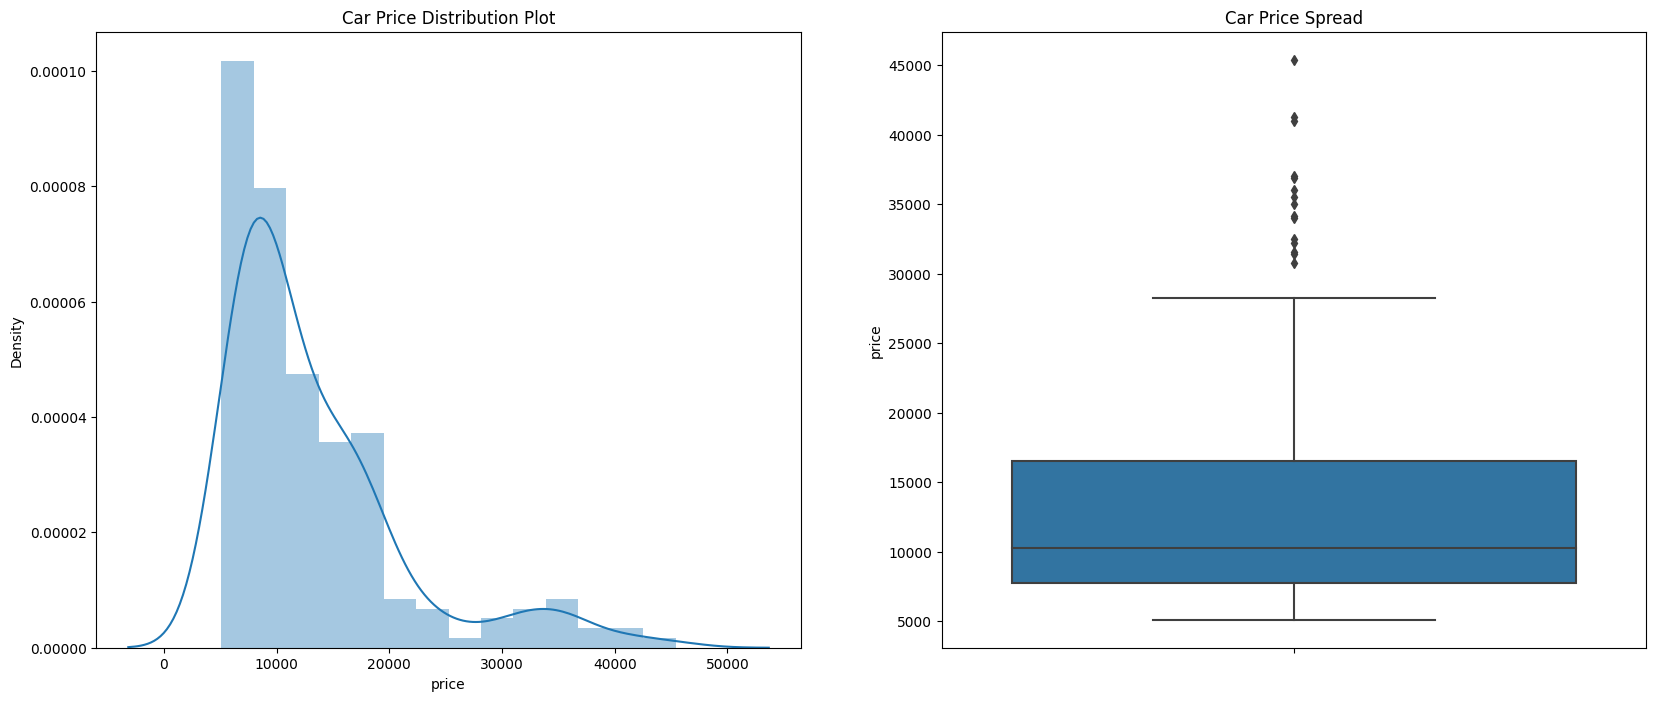

In [352]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(df.price)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=df.price)

plt.show()

* The plot seemed to be right-skewed, meaning that the most prices in the dataset are low(Below 15,000).

* There is a significant difference between the mean and the median of the price distribution.

* The data points are far spread out from the mean, which indicates a high variance in the car prices.(85% of the prices are below 18,500, whereas the remaining 15% are between 18,500 and 45,400.)

Visualization of categorical variable

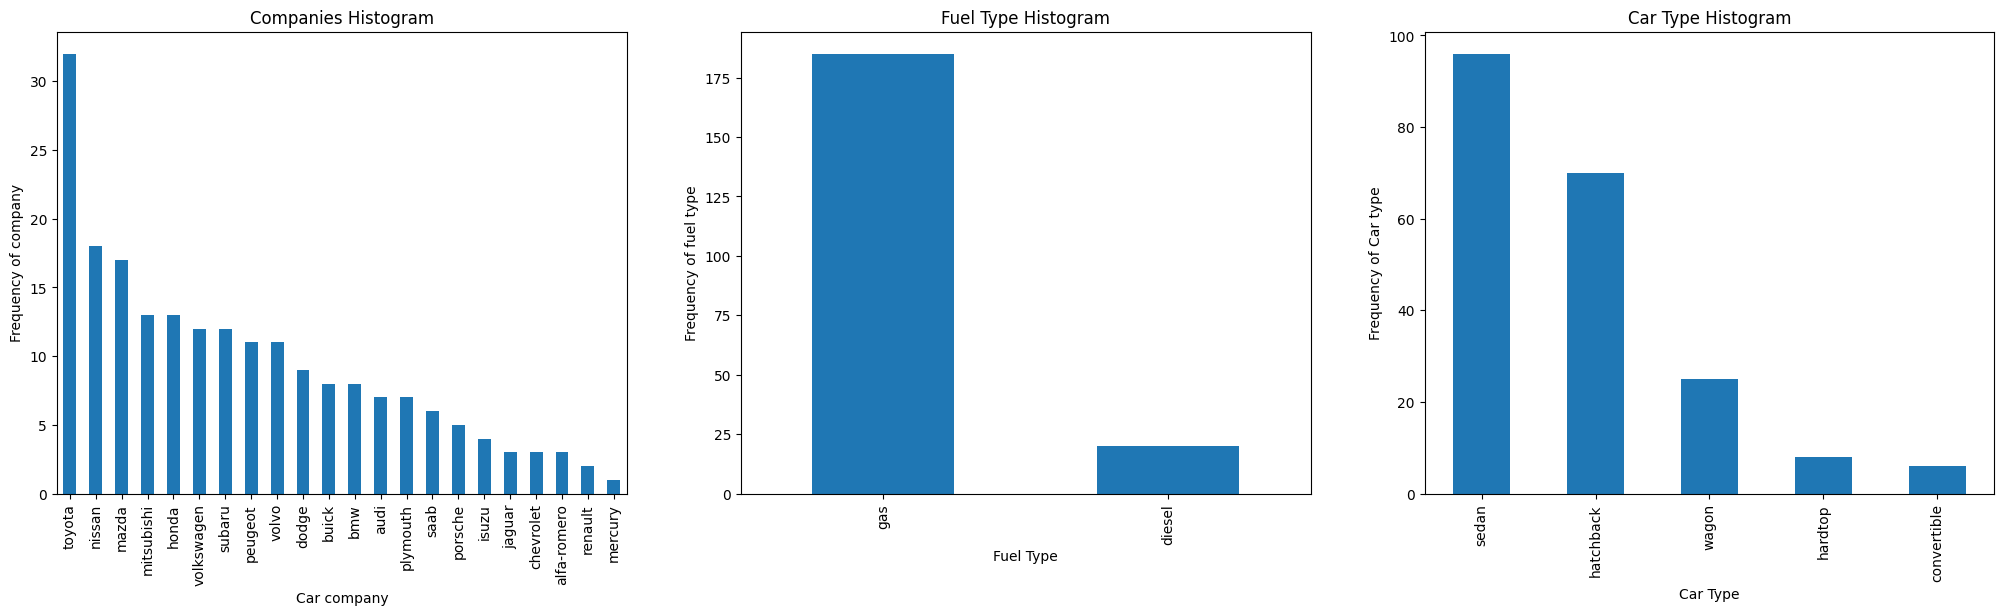

In [353]:
plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt1 = df.CompanyName.value_counts().plot(kind='bar')
plt.title('Companies Histogram')
plt1.set(xlabel = 'Car company', ylabel='Frequency of company')

plt.subplot(1,3,2)
plt1 = df.fueltype.value_counts().plot(kind='bar')
plt.title('Fuel Type Histogram')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of fuel type')

plt.subplot(1,3,3)
plt1 = df.carbody.value_counts().plot(kind='bar')
plt.title('Car Type Histogram')
plt1.set(xlabel = 'Car Type', ylabel='Frequency of Car type')

plt.show()

1 Toyota seemed to be favored car company.

2 Number of gas fueled cars are more than diesel.

3 sedan is the top car type prefered.

<Axes: xlabel='carbody', ylabel='price'>

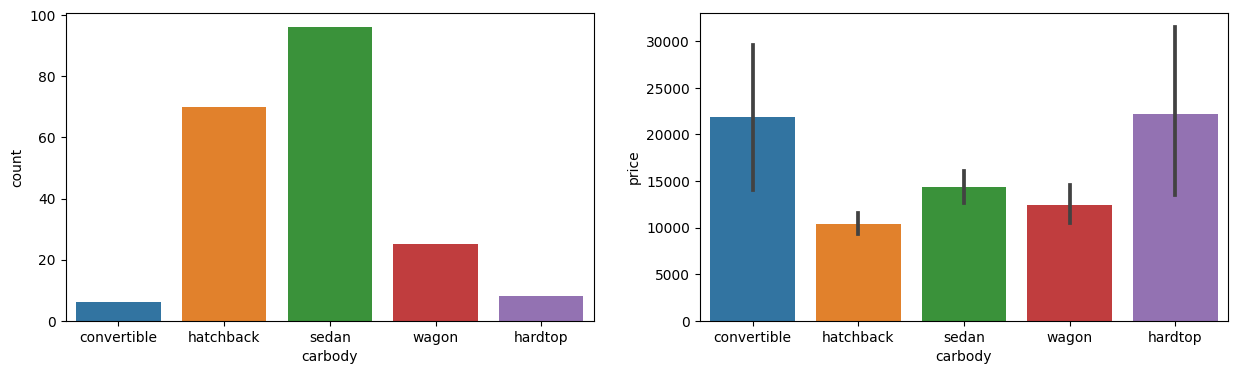

In [354]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.countplot(data=df, x=df.carbody)
plt.subplot(1,2,2)
sns.barplot(data=df,x=df.carbody,y=df.price)

Visualization of numerical variable

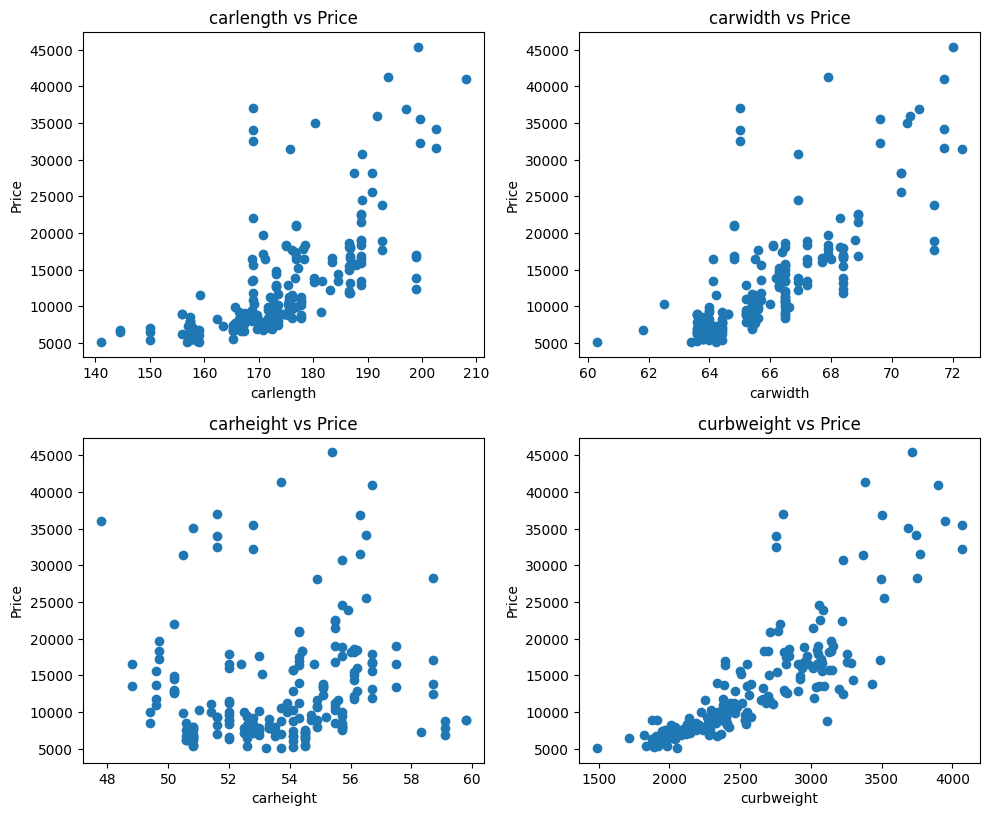

In [355]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(df[x],df['price'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

scatter('carlength', 1)
scatter('carwidth', 2)
scatter('carheight', 3)
scatter('curbweight', 4)

plt.tight_layout()

1 carwidth, carlength and curbweight seems to have a poitive correlation with price.

2 carheight doesn't show any significant trend with price.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


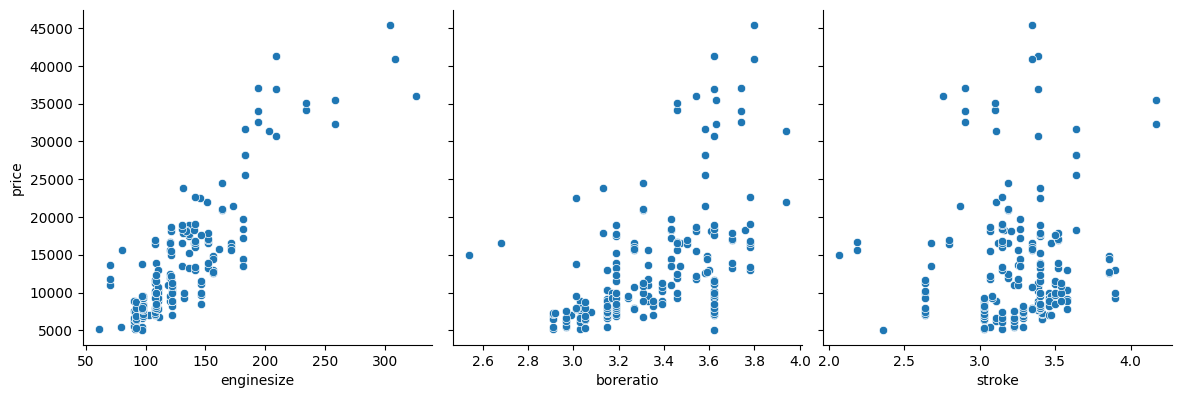

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


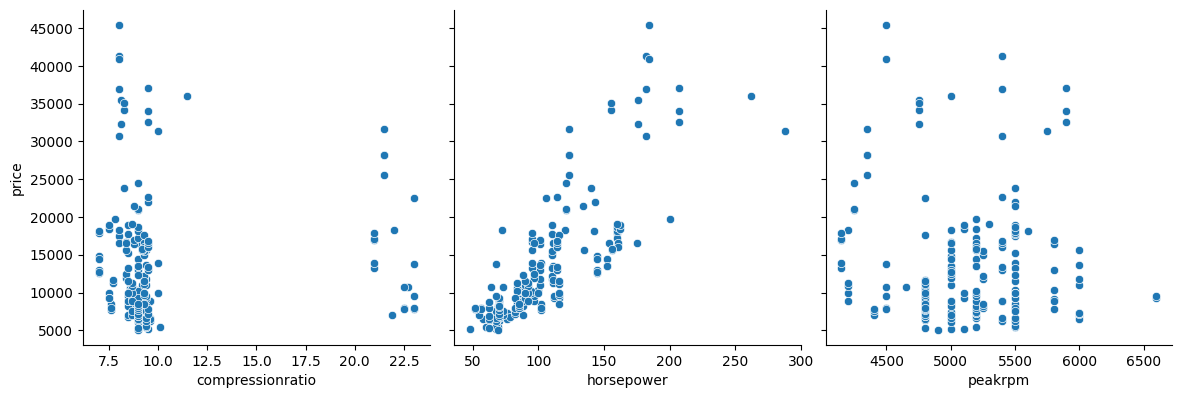

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


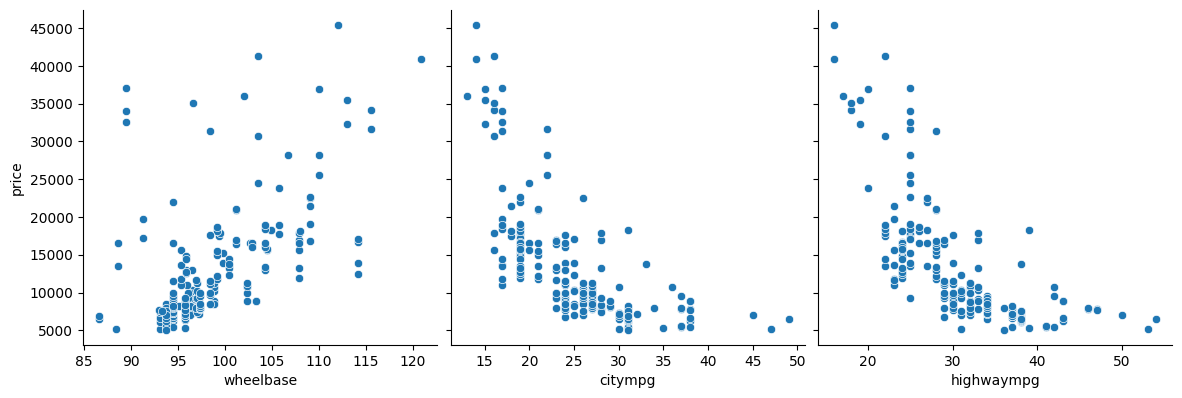

In [356]:
def pp(x,y,z):
    sns.pairplot(df, x_vars=[x,y,z], y_vars='price',size=4, aspect=1, kind='scatter')
    plt.show()

pp('enginesize', 'boreratio', 'stroke')
pp('compressionratio', 'horsepower', 'peakrpm')
pp('wheelbase', 'citympg', 'highwaympg')

1 enginesize, boreratio, horsepower, wheelbase - seem to have a significant positive correlation with price.

2 citympg, highwaympg - seem to have a significant negative correlation with price.

In [357]:
df.drop(columns=['carheight','stroke','compressionratio','peakrpm','aspiration','wheelbase'],inplace=True)
df

,symboling,fueltype,doornumber,carbody,drivewheel,enginelocation,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,citympg,highwaympg,price
0,3,gas,two,convertible,rwd,front,168.8,64.1,2548,dohc,four,130,mpfi,3.47,111,21,27,13495.0
1,3,gas,two,convertible,rwd,front,168.8,64.1,2548,dohc,four,130,mpfi,3.47,111,21,27,16500.0
2,1,gas,two,hatchback,rwd,front,171.2,65.5,2823,ohcv,six,152,mpfi,2.68,154,19,26,16500.0
3,2,gas,four,sedan,fwd,front,176.6,66.2,2337,ohc,four,109,mpfi,3.19,102,24,30,13950.0
4,2,gas,four,sedan,4wd,front,176.6,66.4,2824,ohc,five,136,mpfi,3.19,115,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,four,sedan,rwd,front,188.8,68.9,2952,ohc,four,141,mpfi,3.78,114,23,28,16845.0
201,-1,gas,four,sedan,rwd,front,188.8,68.8,3049,ohc,four,141,mpfi,3.78,160,19,25,19045.0
202,-1,gas,four,sedan,rwd,front,188.8,68.9,3012,ohcv,six,173,mpfi,3.58,134,18,23,21485.0
203,-1,diesel,four,sedan,rwd,front,188.8,68.9,3217,ohc,six,145,idi,3.01,106,26,27,22470.0


In [358]:
df.columns

Index(['symboling', 'fueltype', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'carlength', 'carwidth', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'horsepower',
       'citympg', 'highwaympg', 'price'],
      dtype='object')

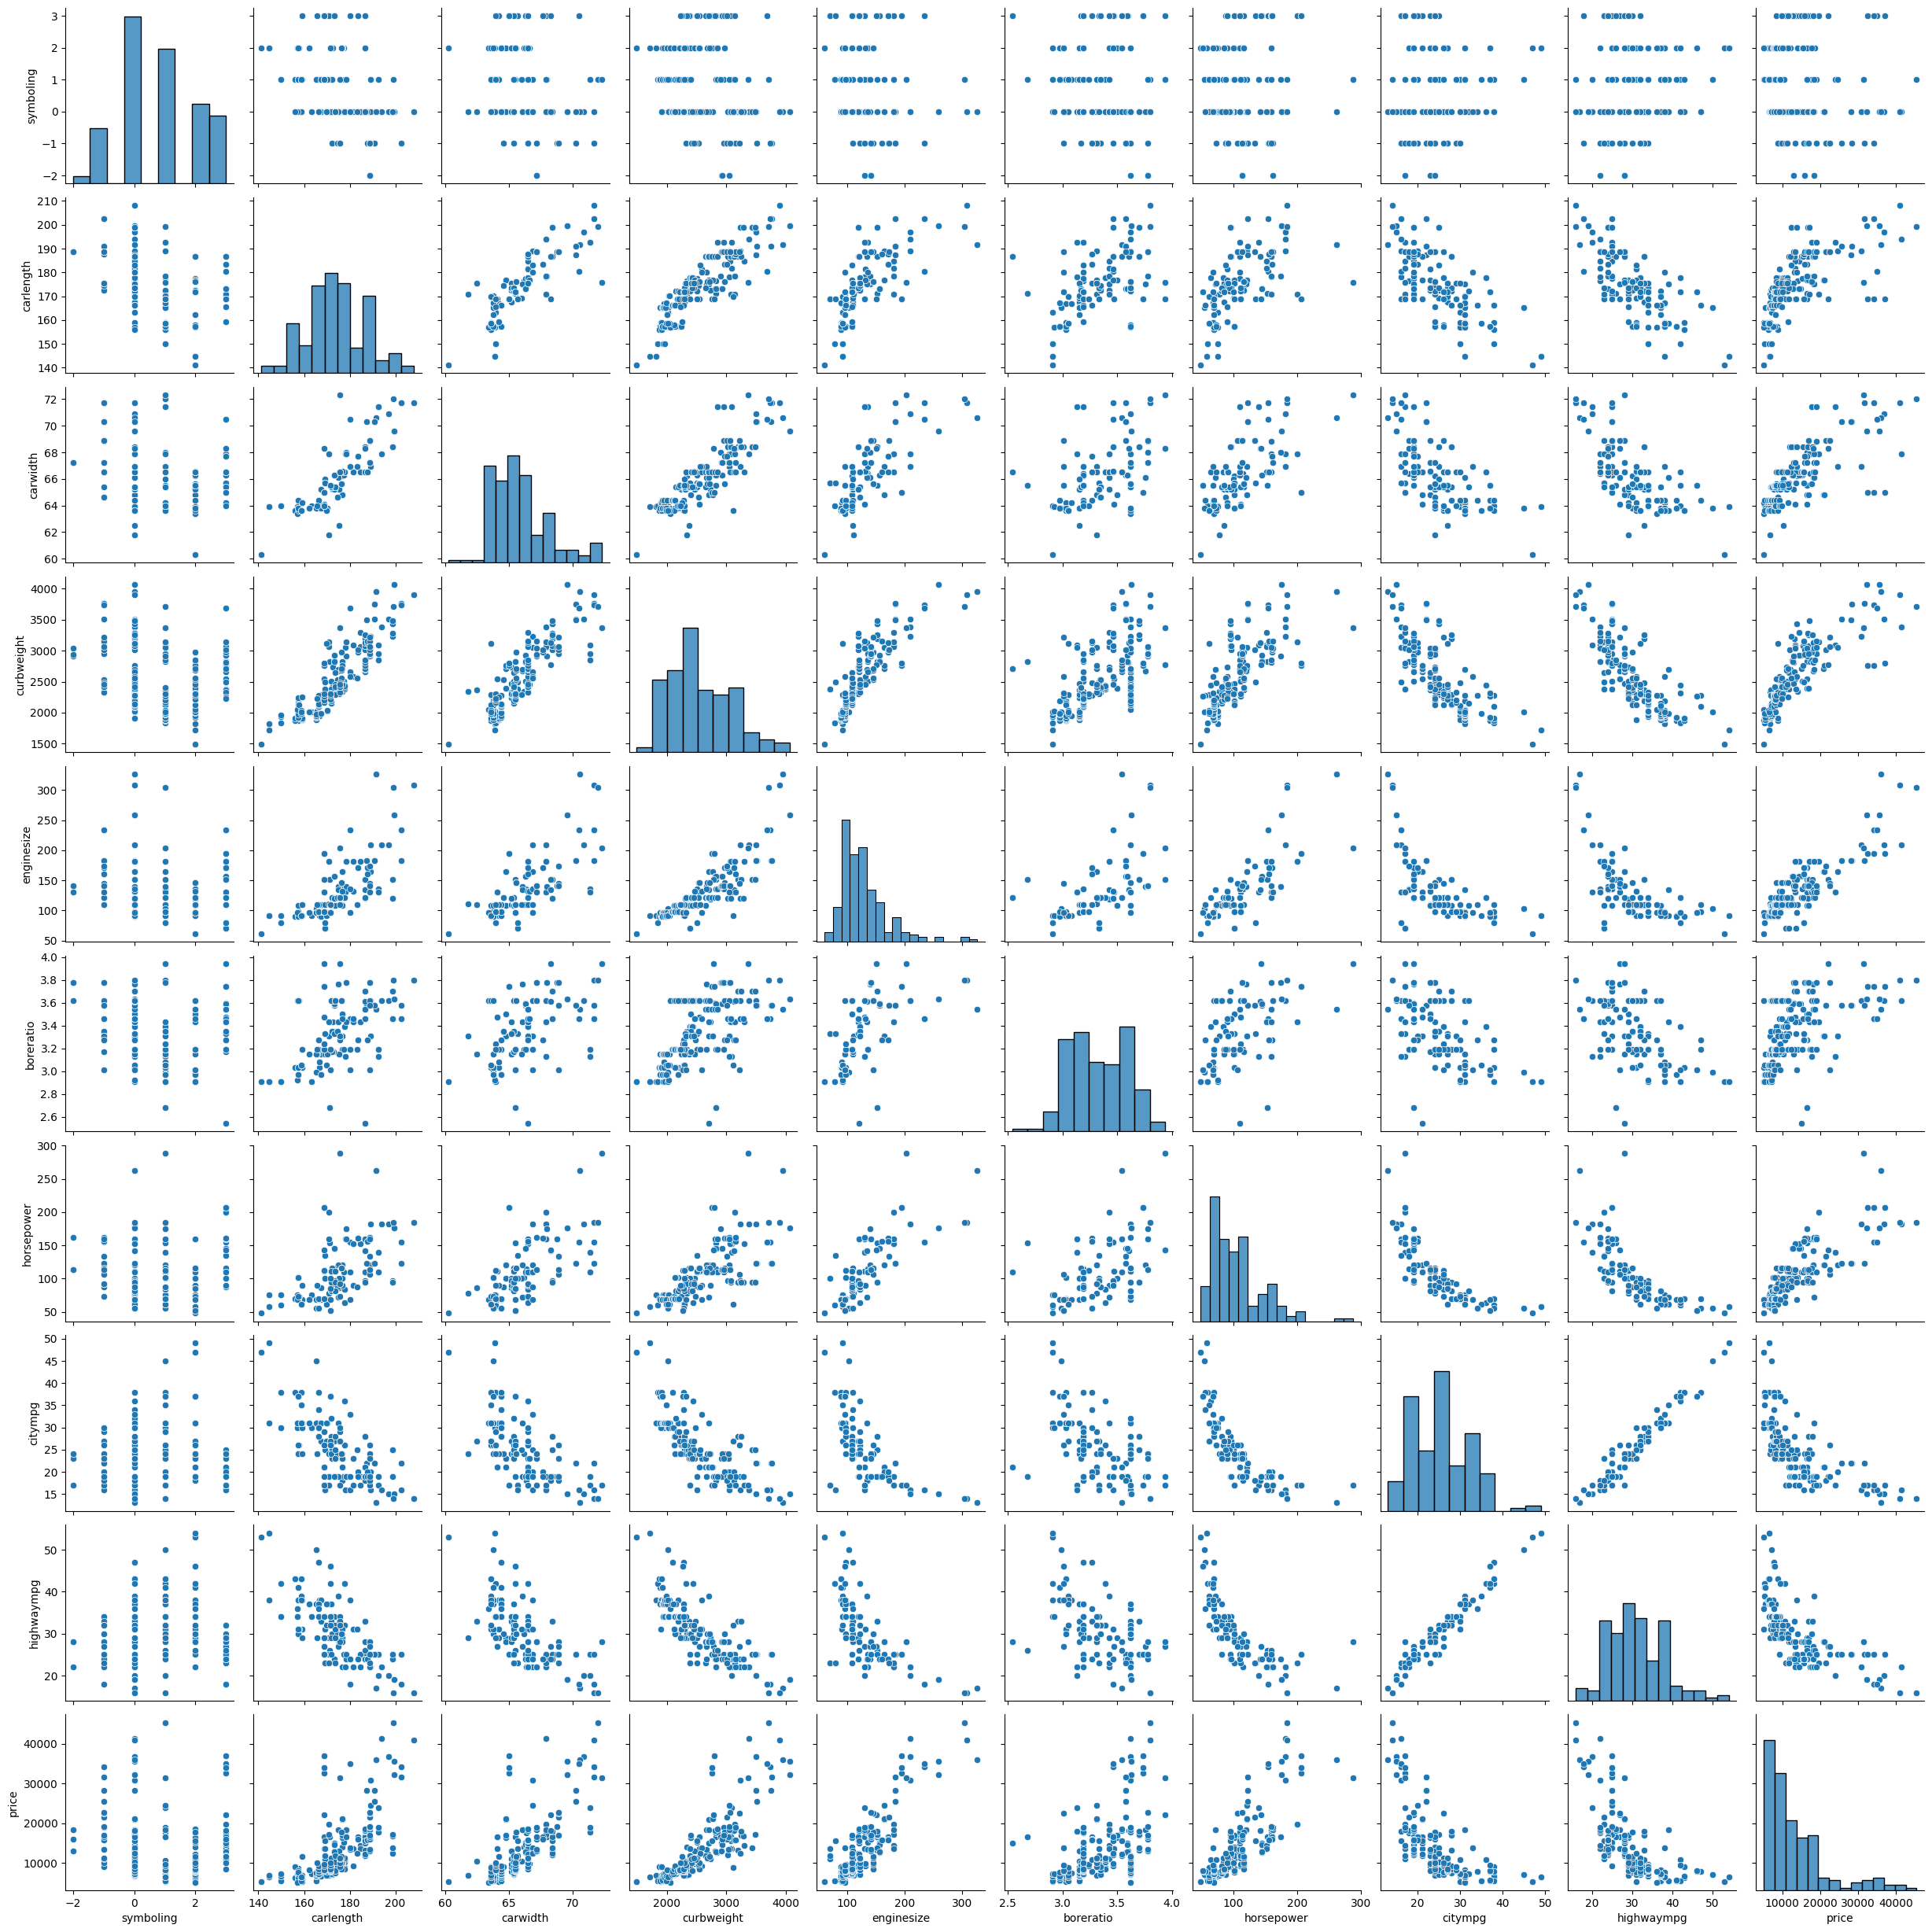

In [359]:
sns.pairplot(df)
plt.show()

<ipython-input-360-f6412ee67fb3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


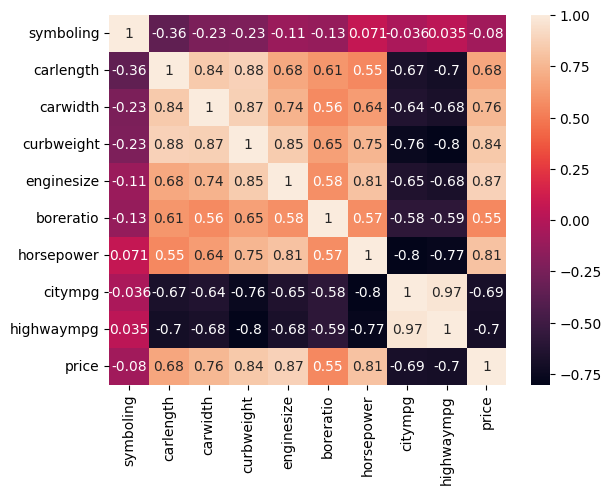

In [360]:
sns.heatmap(df.corr(),annot=True)
plt.show()

In [361]:
#now converting cylinder number to numeric
def cyln_convert(a,b):
    df.cylindernumber.replace(a,b,inplace=True)

cyln_convert('four','4')
cyln_convert('six','6')
cyln_convert('five','5')
cyln_convert('three','3')
cyln_convert('twelve','12')
cyln_convert('two','2')
cyln_convert('eight','8')

df.cylindernumber=df.cylindernumber.astype('int')

### **Encoding categorical values to numerical**

In [362]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
df["fueltype"]=label.fit_transform(df["fueltype"])
df['doornumber']=label.fit_transform(df['doornumber'])
df['carbody']=label.fit_transform(df['carbody'])
df['drivewheel']=label.fit_transform(df['drivewheel'])
df['enginelocation']=label.fit_transform(df['enginelocation'])
df['enginetype']=label.fit_transform(df['enginetype'])
df['fuelsystem']=label.fit_transform(df['fuelsystem'])
df

,symboling,fueltype,doornumber,carbody,drivewheel,enginelocation,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,citympg,highwaympg,price
0,3,1,1,0,2,0,168.8,64.1,2548,0,4,130,5,3.47,111,21,27,13495.0
1,3,1,1,0,2,0,168.8,64.1,2548,0,4,130,5,3.47,111,21,27,16500.0
2,1,1,1,2,2,0,171.2,65.5,2823,5,6,152,5,2.68,154,19,26,16500.0
3,2,1,0,3,1,0,176.6,66.2,2337,3,4,109,5,3.19,102,24,30,13950.0
4,2,1,0,3,0,0,176.6,66.4,2824,3,5,136,5,3.19,115,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,1,0,3,2,0,188.8,68.9,2952,3,4,141,5,3.78,114,23,28,16845.0
201,-1,1,0,3,2,0,188.8,68.8,3049,3,4,141,5,3.78,160,19,25,19045.0
202,-1,1,0,3,2,0,188.8,68.9,3012,5,6,173,5,3.58,134,18,23,21485.0
203,-1,0,0,3,2,0,188.8,68.9,3217,3,6,145,3,3.01,106,26,27,22470.0


### **Spliting Independent and Dependent Features**

In [364]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

### **MODEL SELECTION**

In [365]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [366]:
x_train

,symboling,fueltype,doornumber,carbody,drivewheel,enginelocation,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,citympg,highwaympg
177,-1,1,0,2,1,0,175.6,66.5,2458,3,4,122,5,3.31,92,27,32
75,1,1,1,2,2,0,178.4,68.0,2910,3,4,140,5,3.78,175,19,24
174,-1,0,0,3,1,0,175.6,66.5,2480,3,4,110,3,3.27,73,30,33
31,2,1,1,2,1,0,144.6,63.9,1819,3,4,92,0,2.91,76,31,38
12,0,1,1,3,2,0,176.8,64.8,2710,3,6,164,5,3.31,121,21,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,1,1,1,2,2,0,178.5,67.9,3139,5,6,181,5,3.43,160,19,25
14,1,1,0,3,2,0,189.0,66.9,3055,3,6,164,5,3.31,121,20,25
92,1,1,0,3,1,0,165.3,63.8,1938,3,4,97,1,3.15,69,31,37
179,3,1,1,2,2,0,183.5,67.7,3016,0,6,171,5,3.27,161,19,24


In [367]:
x_test

,symboling,fueltype,doornumber,carbody,drivewheel,enginelocation,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,citympg,highwaympg
15,0,1,0,3,2,0,189.0,66.9,3230,3,6,209,5,3.62,182,16,22
9,0,1,1,2,0,0,178.2,67.9,3053,3,5,131,5,3.13,160,16,22
100,0,1,0,3,1,0,173.4,65.2,2302,3,4,120,1,3.33,97,27,34
132,3,1,1,2,1,0,186.6,66.5,2658,3,4,121,5,3.54,110,21,28
68,-1,0,0,4,2,0,190.9,70.3,3750,3,5,183,3,3.58,123,22,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,3,1,1,2,2,0,169.0,65.7,2380,6,2,70,2,3.33,101,17,23
128,3,1,1,0,2,1,168.9,65.0,2800,4,6,194,5,3.74,207,17,25
76,2,1,1,2,1,0,157.3,64.4,1918,3,4,92,1,2.97,68,37,41
144,0,1,0,3,0,0,172.0,65.4,2385,4,4,108,1,3.62,82,24,25


In [368]:
y_train

177    11248.0
75     16503.0
174    10698.0
31      6855.0
12     20970.0
        ...   
106    18399.0
14     24565.0
92      6849.0
179    15998.0
102    14399.0
Name: price, Length: 143, dtype: float64

In [369]:
y_test

15     30760.000
9      17859.167
100     9549.000
132    11850.000
68     28248.000
         ...    
56     11845.000
128    37028.000
76      5389.000
144     9233.000
104    17199.000
Name: price, Length: 62, dtype: float64

### **SCALING/ NORMALIZATION**

In [370]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
scalar.fit(x_train)
x_train=scalar.fit_transform(x_train)
x_test=scalar.fit_transform(x_test)

In [371]:
x_train

array([[-1.5       ,  0.30265996, -0.88741197, ..., -0.34075625,
         0.37011796,  0.27024799],
       [ 0.125     ,  0.30265996,  1.12687234, ...,  1.7237848 ,
        -0.98698122, -1.01793411],
       [-1.5       , -3.30403793, -0.88741197, ..., -0.81336203,
         0.87903015,  0.43127076],
       ...,
       [ 0.125     ,  0.30265996, -0.88741197, ..., -0.91285799,
         1.04866755,  1.07536181],
       [ 1.75      ,  0.30265996,  1.12687234, ...,  1.37554896,
        -0.98698122, -1.01793411],
       [-0.6875    ,  0.30265996, -0.88741197, ...,  1.15168307,
        -1.32625602, -1.33997964]])

In [372]:
x_test

array([[-0.63602731,  0.38490018, -0.87831007, ...,  2.18035494,
        -1.31581608, -1.20210967],
       [-0.63602731,  0.38490018,  1.13855009, ...,  1.59202574,
        -1.31581608, -1.20210967],
       [-0.63602731,  0.38490018, -0.87831007, ..., -0.09273518,
         0.11087163,  0.27863469],
       ...,
       [ 0.94132042,  0.38490018,  1.13855009, ..., -0.86826004,
         1.40786045,  1.14240223],
       [-0.63602731,  0.38490018, -0.87831007, ..., -0.49386873,
        -0.27822502, -0.83192358],
       [ 1.72999429,  0.38490018,  1.13855009, ...,  1.59202574,
        -0.92671943, -0.83192358]])

### **MODEL CREATION**

In [373]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)


LinearRegression()

In [374]:
y_pred = lr.predict(x_test)
y_pred

array([24462.08035954, 17591.28917192, 11205.18617461, 13529.36507483,
       24994.67636386,  6975.01769371,  8167.12345233,  8512.33681812,
        9603.49525063,  7118.04898444, 16397.97171292,  9314.01101511,
       15363.39798396, 13480.99740657, 38361.44889587,  7906.82027263,
       -1839.57321916, 16832.37161877, 11945.40273162, 10207.3522415 ,
       12793.41503336, 20905.4786164 ,  8134.62607462,  5327.52908518,
        7327.81955613, 24358.38789453, 15666.66011211, 16080.29401618,
        6586.31695085, 16514.22038244, 25405.60743971,  8221.57984391,
        5579.97525255, 23272.19079351,  8455.8959892 , 25991.96652653,
        9924.45210963, 11343.33898437,  6292.35460925, 17023.94535248,
        9427.63882286, 13578.0813901 , 17947.61735176,  6442.4965718 ,
        7423.4593182 , 10465.78434719,  8221.57984391,  7823.41803496,
       18857.86651849, 16971.06446753,  5871.16066301, 22520.5036565 ,
        4792.13080901, 12153.30672857,  6556.8485013 , 14199.58189321,
      

In [375]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
rmse=np.sqrt(mse)

In [376]:
print('mean absolute error',mae)
print('mean squared error',mse)
print('r2 score',r2)
print('root mean squared error',rmse)

mean absolute error 2581.168364101984
mean squared error 13784620.77473516
r2 score 0.8010428750169747
root mean squared error 3712.7645730284544
